1. Schritt:
   Einlesen der CSV in Dataframe und ausgabe der ersten paar Zeilen

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

input_filename = '1run_225_end_compression_particle-data.csv'

# Read the CSV into a pandas DataFrame
df = pd.read_csv(input_filename, skiprows=[1])  # Skip the first row with the "time (s)" information

df.head()

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,Tensile Stress,Particle ID From,Shear Stress,Coordinate : Y,von Mises Stress,Coordinate : X,Coordinate : Z,Particle ID To
0,15.47400,30574.0,28.7137,-0.000166,54.8628,-0.000241,0.000046,30575.0
1,14.40580,30575.0,26.7306,-0.000167,51.1890,-0.000242,0.000046,30576.0
2,17.19890,30573.0,30.5817,-0.000165,58.7392,-0.000240,0.000045,30574.0
3,9.96378,121074.0,14.2815,-0.000161,29.4453,-0.000241,0.000035,121075.0
4,12.97660,121073.0,15.1627,-0.000161,33.2843,-0.000241,0.000036,121074.0


Umbenennung der Spalten um die Datenauswertung zu erleichtern

In [2]:
new_column_names = {
    'Tensile Stress': 'stress_tensile',
    'Particle ID From': 'id_from',
    'Shear Stress': 'stress_shear',
    'Coordinate : Y': 'pos_y',
    'von Mises Stress': 'stress_mises',
    'Coordinate : X': 'pos_x',
    'Coordinate : Z': 'pos_z',
    'Particle ID To': 'id_to',
}

df.rename(columns=new_column_names, inplace=True)

df.head()

,stress_tensile,id_from,stress_shear,pos_y,stress_mises,pos_x,pos_z,id_to
0,15.47400,30574.0,28.7137,-0.000166,54.8628,-0.000241,0.000046,30575.0
1,14.40580,30575.0,26.7306,-0.000167,51.1890,-0.000242,0.000046,30576.0
2,17.19890,30573.0,30.5817,-0.000165,58.7392,-0.000240,0.000045,30574.0
3,9.96378,121074.0,14.2815,-0.000161,29.4453,-0.000241,0.000035,121075.0
4,12.97660,121073.0,15.1627,-0.000161,33.2843,-0.000241,0.000036,121074.0


Löschen der uninteressanten Spalten

In [3]:
columns_to_drop = ['id_from', 'id_to', 'stress_mises', 'stress_shear']
df.drop(columns=columns_to_drop, inplace=True)

new_order = ['pos_x', 'pos_y', 'pos_z', 'stress_tensile']

# Modify the original DataFrame in place
df = df[new_order].copy()
df.head()

,pos_x,pos_y,pos_z,stress_tensile
0,-0.000241,-0.000166,0.000046,15.47400
1,-0.000242,-0.000167,0.000046,14.40580
2,-0.000240,-0.000165,0.000045,17.19890
3,-0.000241,-0.000161,0.000035,9.96378
4,-0.000241,-0.000161,0.000036,12.97660


Umrechnen der Positionen von m in µm
und Berechnung des Abstandes zur Z-Achse

In [4]:
df['pos_x'] *= 1e6
df['pos_y'] *= 1e6
df['pos_z'] *= 1e6
df['radius'] = (df['pos_x']**2 + df['pos_y']**2).apply(lambda x: x**0.5)

df.head()


,pos_x,pos_y,pos_z,stress_tensile,radius
0,-240.831,-166.097,45.5818,15.47400,292.553899
1,-241.765,-167.355,45.7415,14.40580,294.037432
2,-239.897,-164.839,45.4221,17.19890,291.071240
3,-241.165,-161.283,34.6951,9.96378,290.125427
4,-240.550,-161.248,36.1446,12.97660,289.594924


Übersicht der Werte

In [5]:
df.describe()

,pos_x,pos_y,pos_z,stress_tensile,radius
count,129837.000000,129837.000000,129837.000000,129837.000000,129837.000000
mean,-1.951587,13.737188,89.815286,1322.631754,146.948330
std,118.888847,103.857563,48.565134,4253.038969,59.325323
min,-310.038000,-276.395000,3.144430,0.000000,0.963317
25%,-95.825300,-67.860600,48.552600,0.000000,104.097577
50%,-1.619870,9.589480,89.692600,5.732920,149.571616
75%,91.813900,92.865500,130.369000,225.836000,190.866378
max,315.437000,328.369000,177.016000,70999.700000,337.533995


     tensile_stress  quantity  cumulative_sum
0             250.0  102260.0        102260.0
1             750.0    4944.0        107204.0
2            1250.0    3051.0        110255.0
3            1750.0    2117.0        112372.0
4            2250.0    1721.0        114093.0
..              ...       ...             ...
137         68750.0       2.0        129834.0
138         69250.0       0.0        129834.0
139         69750.0       0.0        129834.0
140         70250.0       0.0        129834.0
141         70750.0       3.0        129837.0

[142 rows x 3 columns]
Für debugging. Anzahl der Werte unter 500pN: 102260
Für debugging. Anzahl der Werte unter 1000pN: 107204


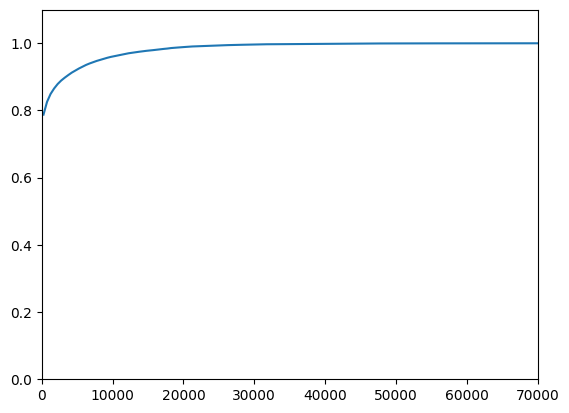

In [6]:
# Define the bins for the distribution
bins_min = 0
bins_max = 71000
bins_step = 500
bins = np.arange(bins_min, bins_max, bins_step)


# Create a new dataframe for distribution analysis
distribution_df = pd.DataFrame(columns=['tensile_stress', 'quantity'])

# Populate the new dataframe with mean tensile stress and quantity information
for i in range(int(bins_max/bins_step)):  
    lower_bound = i * bins_step
    upper_bound = lower_bound + bins_step
    subset = df[df['stress_tensile'].between(lower_bound, upper_bound, inclusive='left')]
    distribution_df.loc[i] = [i*bins_step + bins_step / 2, subset.shape[0]]

distribution_df['cumulative_sum'] = distribution_df['quantity'].cumsum()
print(distribution_df)

count_below_500 = len(df[df['stress_tensile'] < 500])
count_below_1000 = len(df[df['stress_tensile'] < 1000])
print(f'Für debugging. Anzahl der Werte unter 500pN: {count_below_500}')
print(f'Für debugging. Anzahl der Werte unter 1000pN: {count_below_1000}')

distribution_df.cumulative_sum = distribution_df.cumulative_sum / distribution_df.cumulative_sum.max()
plt.plot(distribution_df.tensile_stress, distribution_df.cumulative_sum)
plt.ylim(0,1.1)
plt.xlim(0,70000)
plt.show()

In [7]:
# chat_df[chat_df.username == username1]
z_layer = 100
z_layer_height = 10
z_min = z_layer - z_layer_height/2
z_max = z_layer + z_layer_height/2
df_layer = df[(df.pos_z >= z_min) & (df.pos_z < z_max)]
df_layer.describe()
# df[(df['pos_z'] >= z_min) & (df['pos_z'] <= z_max)]

,pos_x,pos_y,pos_z,stress_tensile,radius
count,7999.000000,7999.000000,7999.00000,7999.000000,7999.000000
mean,0.319599,13.434391,99.98100,1503.718257,149.822796
std,119.793003,106.622259,2.90923,5076.371780,58.733299
min,-264.814000,-276.395000,95.00020,0.000000,1.918896
25%,-92.851500,-74.903850,97.41125,0.000000,107.533954
50%,-2.543260,11.988400,99.94270,7.682500,152.831106
75%,95.161700,96.651300,102.55050,324.281000,192.600570
max,291.401000,302.184000,104.99800,68869.600000,303.081692


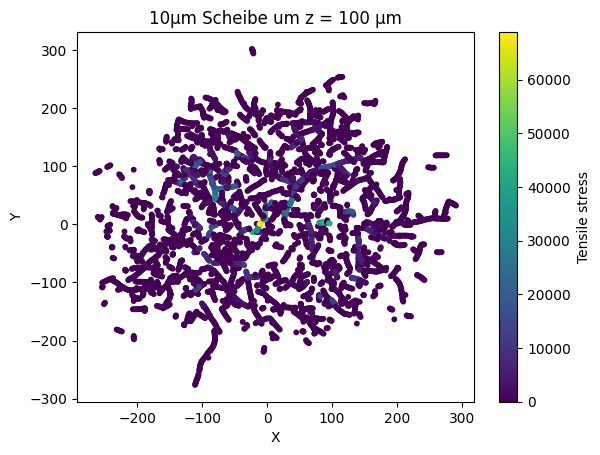

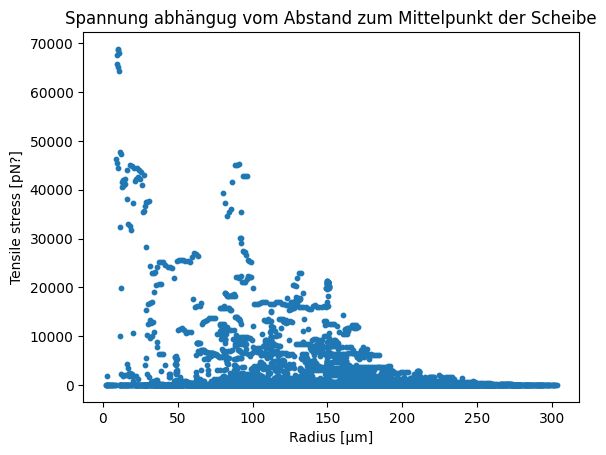

In [8]:
import numpy as np
import matplotlib.pyplot as plt

plt.scatter(df_layer['pos_x'], df_layer['pos_y'], c=df_layer['stress_tensile'], cmap='viridis', s=10)
plt.colorbar(label='Tensile stress')  # Add color bar for reference

# Add labels and title if needed
plt.xlabel('X')
plt.ylabel('Y')
plt.title('10µm Scheibe um z = 100 µm')

# Show the plot
plt.show()


plt.scatter(df_layer['radius'], df_layer['stress_tensile'],s=10)
plt.xlabel('Radius [µm]')
plt.ylabel('Tensile stress [pN?]')
plt.title('Spannung abhängug vom Abstand zum Mittelpunkt der Scheibe')
plt.show()

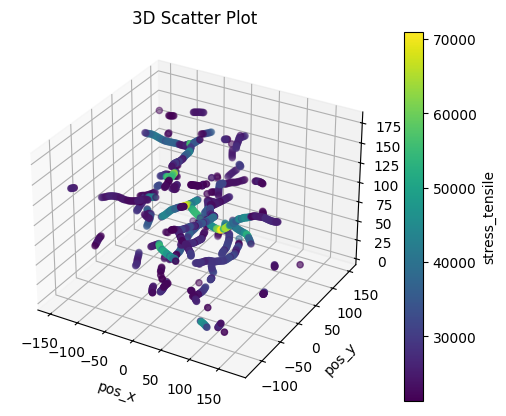

In [9]:

from mpl_toolkits.mplot3d import Axes3D  # Importing 3D axes for Matplotlib


df_high_stress = df[df.stress_tensile >= df.stress_tensile.max() *  0.3]

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with pos_x, pos_y, pos_z as coordinates and stress_tensile as color
scatter = ax.scatter(df_high_stress['pos_x'], df_high_stress['pos_y'], df_high_stress['pos_z'], c=df_high_stress['stress_tensile'], cmap='viridis')

# Add labels
ax.set_xlabel('pos_x')
ax.set_ylabel('pos_y')
ax.set_zlabel('pos_z')
ax.set_title('3D Scatter Plot')

# Add colorbar
cbar = fig.colorbar(scatter, ax=ax, label='stress_tensile')

# Show the plot
plt.show()


In [10]:
import numpy as np
from matplotlib.ticker import MaxNLocator
grid_min = -350
grid_max = 350
grid_spacing = 5
grid_number = (grid_max - grid_min) / grid_spacing

x_y_axis = np.linspace(grid_min, grid_max - grid_spacing, int(grid_number))
x, y = np.meshgrid(x_y_axis, x_y_axis)

stress_mean = np.full_like(x, np.nan)
stress_max = np.full_like(x, np.nan)


for i in range(len(x_y_axis) -1):
    for j in range(len(x_y_axis) -1):
        x_val = x[i, j]
        y_val = y[i, j]
        stress_cell = df.loc[((df['pos_x'] >= x[i, j]) & (df['pos_x'] < x[i, j+1]))
                        & ((df['pos_y'] >= y[i, j]) & (df['pos_y'] < y[i+1, j])), 'stress_tensile']
        stress_mean[i, j] = stress_cell.mean()
        stress_max[i,j] = stress_cell.max()


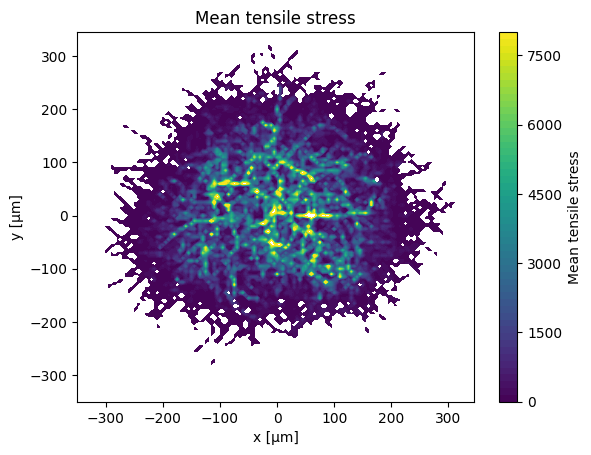

In [11]:
levels = np.linspace(0, 8000, 55)
fig, ax = plt.subplots()
plt.title('Mean tensile stress')
plt.xlabel('x [µm]')
plt.ylabel('y [µm]')
contour = ax.contourf(x, y, stress_mean, levels=levels, cmap='viridis')
cbar = fig.colorbar(contour, ticks=MaxNLocator(nbins=6))
cbar.set_label('Mean tensile stress')

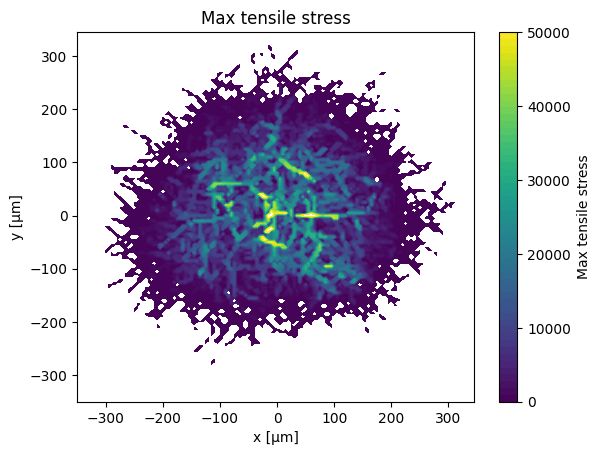

In [12]:
levels = np.linspace(0, 50000, 55)
fig, ax = plt.subplots()
plt.title('Max tensile stress')
plt.xlabel('x [µm]')
plt.ylabel('y [µm]')
contour = ax.contourf(x, y, stress_max, levels=levels, cmap='viridis')
cbar = fig.colorbar(contour, ticks=MaxNLocator(nbins=6))
cbar.set_label('Max tensile stress')